In [27]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [28]:
images = os.listdir('C:/Users/Xueho/PD_segment/small/training/')
png_list = []
for image in images:
    if image[-3:] == 'png':
        png_list.append(image) # read only png files
print(len(png_list))
print(png_list[0:4])

1147
['ADE_train_00000191_seg.png', 'ADE_train_00000341_seg.png', 'ADE_train_00000557_seg.png', 'ADE_train_00000561_seg.png']


### check sample image

In [30]:
cd C:\Users\Xueho\PD_segment\small\training

C:\Users\Xueho\PD_segment\small\training


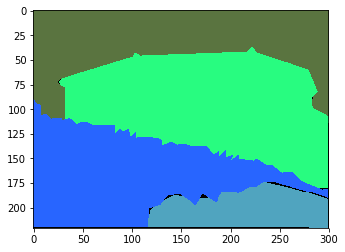

In [68]:
# check sample image
image = mpimg.imread(png_list[100])
plt.imshow(image)

### construct gray scale matrix for all png images

In [24]:
from skimage import io
img_list =[]
for item in png_list:
    image = io.imread(item, as_grey=True)
    pix = np.array(image)
    img_list.append(pix)
print(len(img_list))

1147


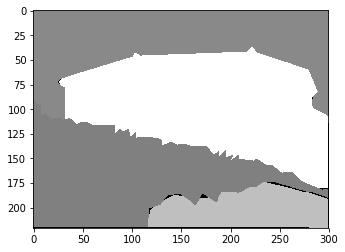

In [69]:
plt.imshow(img_list[100], cmap=plt.get_cmap('gray'))

In [ ]:
!pip install opencv-python

In [91]:
import cv2
# Create a custom kernel, 3x3 array for bottom edge detection
bottom_sobel = np.array([-1,-2,-1,
                          0,0,0,
                          1,2,1]).reshape(3,3)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(img_list[100], -1, bottom_sobel)

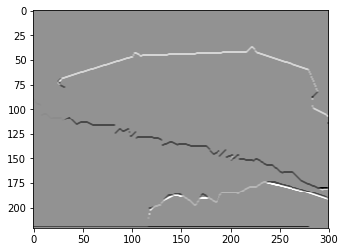

In [92]:
plt.imshow(filtered_image, cmap=plt.get_cmap('gray'))

In [89]:
# Create second kernel for right edge detection
right_sobel = np.array([-1,0,1,
                        -2,0,2,
                        -1,0,1]).reshape(3,3)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(img_list[100], -1, right_sobel)

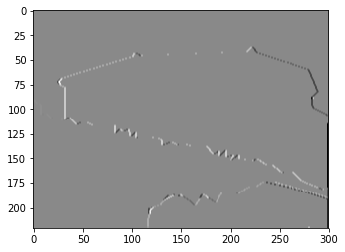

In [90]:
plt.imshow(filtered_image, cmap=plt.get_cmap('gray'))

In [87]:
# Create third kernel for left edge detection
left_sobel = np.array([1,0,-1,
                       2,0,-2,
                       1,0,-1]).reshape(3,3)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(img_list[100], -1, left_sobel)

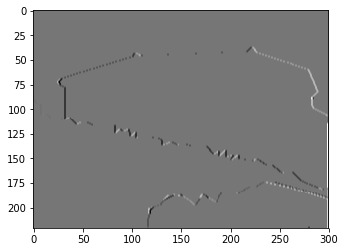

In [88]:
plt.imshow(filtered_image, cmap=plt.get_cmap('gray'))

In [97]:
### bottom edge detection seems to give the best definition for the edges.  

In [96]:
# Filter all images using bottom edge detection  
filtered_img_list =[]
for item in img_list:
    filtered_image = cv2.filter2D(item, -1, bottom_sobel)
    filtered_img_list.append(filtered_image)

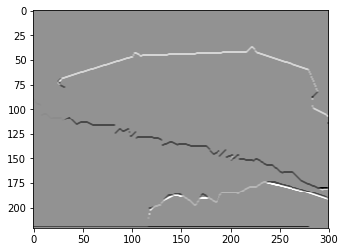

In [95]:
plt.imshow(filtered_img_list[100], cmap=plt.get_cmap('gray'))